## **Connect and query a db with sqlite and explore it with tidymodels**

In [2]:
library(DBI)
library(RSQLite)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
mydb <- dbConnect(RSQLite::SQLite(), "")

In [4]:
wine_ratings <- readr::read_csv('https://raw.githubusercontent.com/paiml/wine-ratings/main/wine-ratings.csv')
chocolate_ratings <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-18/chocolate.csv')


New names:
• `` -> `...1`
Rows: 32780 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): name, region, variety, notes
dbl (2): ...1, rating
lgl (1): grape

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2530 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): company_manufacturer, company_location, country_of_bean_origin, spe...
dbl (3): ref, review_date, rating

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
mydb <- dbConnect(RSQLite::SQLite(), "")
dbWriteTable(mydb, "chocolate_ratings", chocolate_ratings)
dbWriteTable(mydb, "wine_ratings", wine_ratings)
dbListTables(mydb)

[1] "chocolate_ratings" "wine_ratings"

In [6]:
dbGetQuery(mydb, 'SELECT * FROM chocolate_ratings LIMIT 5')

ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [7]:
chocolate_ratings <- dbGetQuery(mydb, 'SELECT ref, company_manufacturer, company_location, country_of_bean_origin, most_memorable_characteristics, rating FROM chocolate_ratings')
chocolate_ratings

ref,company_manufacturer,company_location,country_of_bean_origin,most_memorable_characteristics,rating
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
2454,5150,U.S.A.,Tanzania,"rich cocoa, fatty, bready",3.25
2458,5150,U.S.A.,Dominican Republic,"cocoa, vegetal, savory",3.50
2454,5150,U.S.A.,Madagascar,"cocoa, blackberry, full body",3.75
2542,5150,U.S.A.,Fiji,"chewy, off, rubbery",3.00
2546,5150,U.S.A.,Venezuela,"fatty, earthy, moss, nutty,chalky",3.00
2546,5150,U.S.A.,Uganda,"mildly bitter, basic cocoa, fatty",3.25
2542,5150,U.S.A.,India,"milk brownie, macadamia,chewy",3.50
797,A. Morin,France,Bolivia,"vegetal, nutty",3.50
797,A. Morin,France,Peru,"fruity, melon, roasty",3.75


In [8]:
dbGetQuery(mydb, 'SELECT * FROM wine_ratings LIMIT 5')

...1,name,grape,region,variety,rating,notes
<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>
0,1000 Stories Bourbon Barrel Aged Batch Blue Carignan 2016,NA,"Mendocino, California",Red Wine,91,"This is a very special, limited release of 1000 Stories Bourbon Barrel-Aged Carignan, their first-ever release of Carignan as a single varietal. Classic and rustic with a little edge. Look for notes of brilliantly racy red and black fruits set to a rich backdrop of toast, herbs, and cocoa."
1,1000 Stories Bourbon Barrel Aged Gold Rush Red 2016,NA,California,Red Wine,89,"The California Gold Rush was a period of courage, bravado and curiosity. It was with these characteristics in mind that we crafted Gold Rush Red. Grapes chosen from the golden hills and valleys of California were blended to create this bold, adventurous testament to that intrepid spirit."
2,1000 Stories Bourbon Barrel Aged Gold Rush Red 2017,NA,California,Red Wine,90,"The California Gold Rush was a period of courage, bravado and curiosity. Gold Rush is crafted with these characteristics in mind. The grapes used to blend this bold wine are carefully selected from golden hills and valleys of California. It is finished in bourbon barrels, which complements this rich wine with notes of charred vanilla and dried herbs."
3,1000 Stories Bourbon Barrel Aged Zinfandel 2013,NA,"North Coast, California",Red Wine,91,"The wine has a deep, rich purple color. An intense raspberry fruit is on the nose, with black pepper spice and a touch of cloves and dried herbs. The palate is full with ripe tannins, big black and red fruits, followed by an array of spices. The wine finishes with a touch of warmth that lingers on and on."
4,1000 Stories Bourbon Barrel Aged Zinfandel 2014,NA,California,Red Wine,90,"Batch #004 is the first release of the 2014 vintage and once againMendocino Zinfandel plays a big role in the blend with classic oldvineyards such as Sargentini and Rucker vineyards. Head trained and dry farmed, these vineyards give nice raspberry fruits. Dry Creek Valley Zinfandel also makes a big impact on the blend in Batch #004. Dry Creek is a classic and well known source for great Zinfandel and has added a new dimension to the 1000 Stories blend. Black fruits with distinct notes of black pepper and even a bit of clove spice add complexity to the blend. Also new to this batch is the addition of Lodi Zinfandel, with its iconic bold flavors and big character. Rounding out the blend are some Zinfandels from Colusa County, Syrah from Paso Robles and Petite sirah from Mendocino. A portion of the wine is aged in French and American oak for 6 months and then aged further in bourbon barrels. We’ve selected new and used bourbon barrels for these small batches of Zinfandel, which impart characteristics specific to these barrels: charred vanilla, dried herbs and a hint of caramel."


In [9]:
wine_ratings <- dbGetQuery(mydb, 'SELECT name, region, rating, notes FROM wine_ratings')
wine_ratings

name,region,rating,notes
<chr>,<chr>,<dbl>,<chr>
1000 Stories Bourbon Barrel Aged Batch Blue Carignan 2016,"Mendocino, California",91,"This is a very special, limited release of 1000 Stories Bourbon Barrel-Aged Carignan, their first-ever release of Carignan as a single varietal. Classic and rustic with a little edge. Look for notes of brilliantly racy red and black fruits set to a rich backdrop of toast, herbs, and cocoa."
1000 Stories Bourbon Barrel Aged Gold Rush Red 2016,California,89,"The California Gold Rush was a period of courage, bravado and curiosity. It was with these characteristics in mind that we crafted Gold Rush Red. Grapes chosen from the golden hills and valleys of California were blended to create this bold, adventurous testament to that intrepid spirit."
1000 Stories Bourbon Barrel Aged Gold Rush Red 2017,California,90,"The California Gold Rush was a period of courage, bravado and curiosity. Gold Rush is crafted with these characteristics in mind. The grapes used to blend this bold wine are carefully selected from golden hills and valleys of California. It is finished in bourbon barrels, which complements this rich wine with notes of charred vanilla and dried herbs."
1000 Stories Bourbon Barrel Aged Zinfandel 2013,"North Coast, California",91,"The wine has a deep, rich purple color. An intense raspberry fruit is on the nose, with black pepper spice and a touch of cloves and dried herbs. The palate is full with ripe tannins, big black and red fruits, followed by an array of spices. The wine finishes with a touch of warmth that lingers on and on."
1000 Stories Bourbon Barrel Aged Zinfandel 2014,California,90,"Batch #004 is the first release of the 2014 vintage and once againMendocino Zinfandel plays a big role in the blend with classic oldvineyards such as Sargentini and Rucker vineyards. Head trained and dry farmed, these vineyards give nice raspberry fruits. Dry Creek Valley Zinfandel also makes a big impact on the blend in Batch #004. Dry Creek is a classic and well known source for great Zinfandel and has added a new dimension to the 1000 Stories blend. Black fruits with distinct notes of black pepper and even a bit of clove spice add complexity to the blend. Also new to this batch is the addition of Lodi Zinfandel, with its iconic bold flavors and big character. Rounding out the blend are some Zinfandels from Colusa County, Syrah from Paso Robles and Petite sirah from Mendocino. A portion of the wine is aged in French and American oak for 6 months and then aged further in bourbon barrels. We’ve selected new and used bourbon barrels for these small batches of Zinfandel, which impart characteristics specific to these barrels: charred vanilla, dried herbs and a hint of caramel."
1000 Stories Bourbon Barrel Aged Zinfandel 2016,California,91,"1,000 Stories Bourbon barrel-aged Zinfandel is a harmonious balance of Zinfandel grapes from Mendocino and Sonoma counties which are bursting with aromatic red fruit scents and complex black fruit flavors. A touch of Petite Sirah and Syrah enhance those flavors even more with bold black and white pepper spices. The batch is then rounded out with a layer of smokiness derived from the new bourbon barrel aging."
1000 Stories Bourbon Barrel Aged Zinfandel 2017,California,92,"Batch 55 embodies an opulent vintage, which saw its fruit grow amid lush rainfall and balmy temperatures. Nuanced aromas of sun-baked raspberry, crushed blueberry, freshly-turned earth and hints of nutmeg swirl in the glass, segueing to a palate of jammy blackberries, clove and caramel. This blend showcases Zinfandel’s warm, luscious character, accentuated by time spent in our charred bourbon barrels, which lent a graceful, smoky finish to the wine."
12 Linajes Crianza 2014,"Ribera del Duero, Spain",92,"Red with violet hues. The aromas are very intense with mineral and dairy notes with essence of wild black fruits (raspberries and blackberries) combined with spicy elegant notes of black pepper and cloves 

In [10]:
wine_ratings <- dbGetQuery(mydb, 'SELECT name, region, rating, notes FROM wine_ratings ORDER BY rating DESC LIMIT 5')

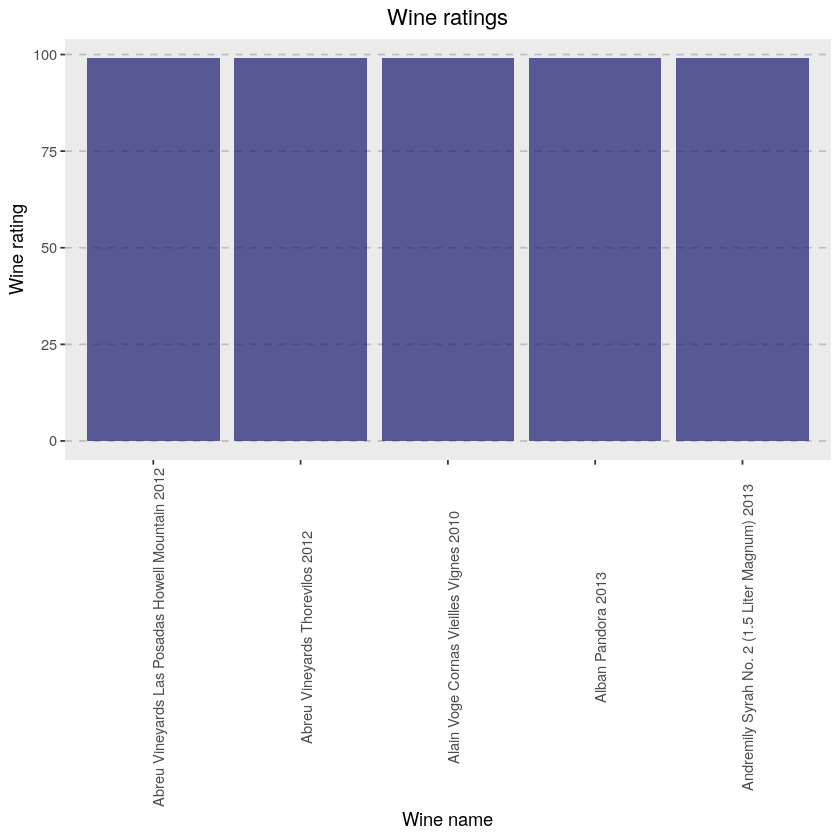

In [11]:
wine_ratings %>% 
  ggplot() +
  geom_col(mapping = aes(x = name, y = rating),
           fill = "midnightblue", alpha = 0.7) +
  ggtitle("Wine ratings") +
  xlab("Wine name") +
  ylab("Wine rating") +
  theme(
    plot.title = element_text(hjust = 0.5),
    
    panel.grid = element_blank(),
    panel.grid.major.y = element_line(color = "gray", linetype = "dashed", size = 0.5),
    
    axis.text.x = element_text(angle = 90)
    
  )

In [12]:
# Load statip into the current R sesssion
library(statip)

wine_ratings <- dbGetQuery(mydb, 'SELECT name, region, rating, notes FROM wine_ratings')

# Get summary statistics
min_val <- min(wine_ratings$rating)
max_val <- max(wine_ratings$rating)
mean_val <- mean(wine_ratings$rating)
med_val <- median(wine_ratings$rating)
mod_val <- mfv(wine_ratings$rating)

# Print the stats
cat(
  "Minimum: ", round(min_val, 2),
   "\nMean: ", round(mean_val, 2),
   "\nMedian: ", round(med_val, 2),
   "\nMode: ", round(mod_val, 2),
   "\nMaximum: ", round(max_val, 2)
)

Minimum:  85 
Mean:  91.19 
Median:  91 
Mode:  90 
Maximum:  99

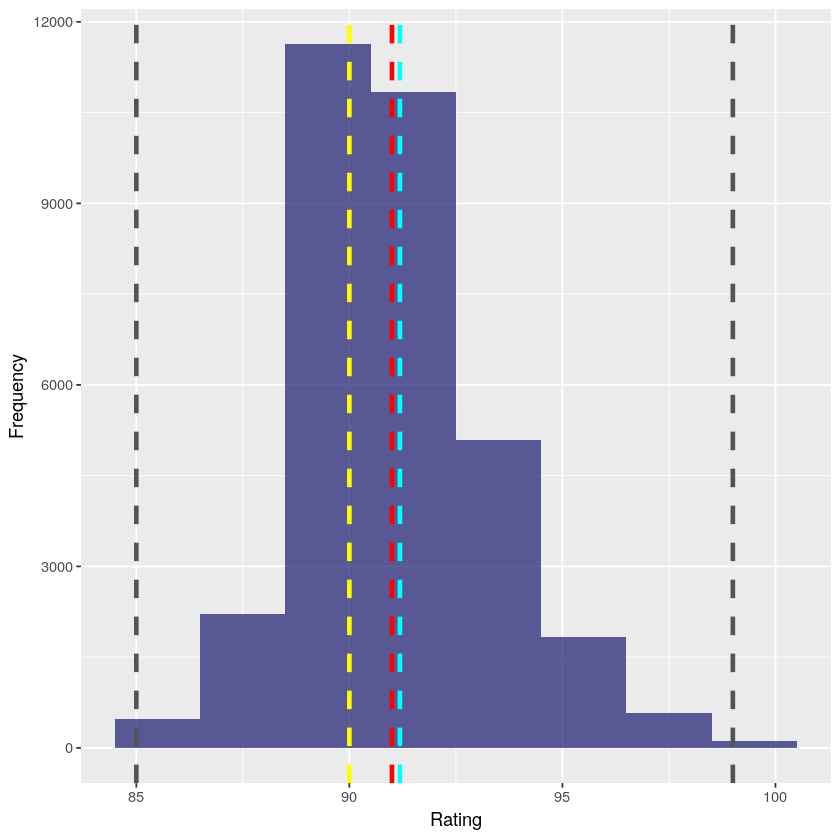

In [13]:
# Rating Distribution
ggplot(data = wine_ratings) +
    geom_histogram(mapping = aes(x = rating), , binwidth = 2, boundary = 0.5, fill = "midnightblue", alpha = 0.7) +
    # Add lines for the statistics
    geom_vline(xintercept = min_val, color = 'gray33', linetype = "dashed", size = 1.3) +
    geom_vline(xintercept = mean_val, color = 'cyan', linetype = "dashed", size = 1.3) +
    geom_vline(xintercept = med_val, color = 'red', linetype = "dashed", size = 1.3 ) +
    geom_vline(xintercept = mod_val, color = 'yellow', linetype = "dashed", size = 1.3 ) +
    geom_vline(xintercept = max_val, color = 'gray33', linetype = "dashed", size = 1.3 ) +
    xlab('Rating') +
    ylab('Frequency') +
    theme(plot.title = element_text(hjust = 0.5))

In [14]:
dbGetQuery(mydb, 'SELECT ref, company_manufacturer, company_location, country_of_bean_origin, most_memorable_characteristics, rating FROM chocolate_ratings WHERE company_location == "Italy"')

ref,company_manufacturer,company_location,country_of_bean_origin,most_memorable_characteristics,rating
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
75,Amedei,Italy,Blend,"red wine, rich cocoa, long",3.75
123,Amedei,Italy,Ecuador,"creamy, earthy, vegetal",3.00
123,Amedei,Italy,Jamaica,"sandy, woody, spicy",3.00
123,Amedei,Italy,Grenada,fruity with coffee notes,3.50
129,Amedei,Italy,Trinidad,"coffee, fruit, woodsy",3.50
170,Amedei,Italy,Blend,"fatty, dairy, caramel, cocoa",3.50
123,Amedei,Italy,Venezuela,"creamy, fruit, cocoa",3.75
979,Amedei,Italy,Peru,"creamy, raspberry, nutty",3.75
2088,Amedei,Italy,Madagascar,"vanilla, mint, roasty",3.00


In [22]:
n_chocolates_per_country <- chocolate_ratings %>% 
       group_by(company_location) %>% 
       count()    

tot_chocolates <- chocolate_ratings %>% nrow()
difference <- n_chocolates_per_country %>% 
              filter(n < 40) %>% 
              pull(n) %>% sum()

tot_chocolates
difference

[1] 2530

[1] 570

In [23]:
n_chocolates_per_country <-   
       n_chocolates_per_country %>% 
       filter (n > 40)

n_chocolates_per_country <- 
       rbind(n_chocolates_per_country, tibble(
              company_location = c("Others"),
              n = difference
       ))

n_chocolates_per_country


company_location,n
<chr>,<int>
Australia,53
Belgium,63
Canada,177
Ecuador,58
France,176
Germany,42
Italy,78
Switzerland,44
U.K.,133


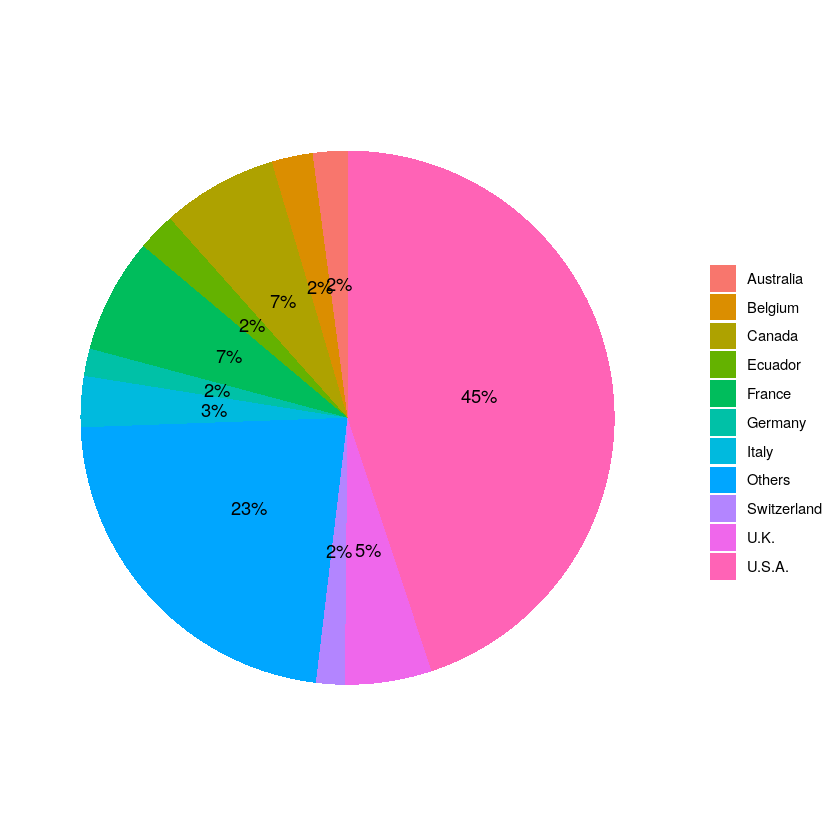

In [24]:
#Pie chart for chocolate countries
ggplot(n_chocolates_per_country, aes(x="", y=n, fill=company_location)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) +
  geom_text(aes(label = paste0(round(n*100/tot_chocolates), "%")), position = position_stack(vjust=0.5)) +
  labs(x = NULL, y = NULL, fill = NULL) +
  theme_classic() +
  theme(axis.line = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank())